This task is about constructing a classifier based on the dataset of the the National Institute of Diabetes and Digestive and Kidney Diseases. Use the dataset and diagnostic measurements included into it to predict whether a patient has diabetes. Several constraints were imposed on the selection of instances from a larger database to obtain the dataset. In this task, all patients are Pima Indian women of 21 years old or older.


The dataset consists of predictors, such as the number of pregnancies, BMI, insulin level, age, and so on. The response takes two values: has (1) diabetes or has no (0) diabetes.

 Download the input dataset and separate from it the first 650 strings.

Enter the number of strings in the obtained sample, which belong to the class 0 (has no diabetes).

In [1]:
#connection to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#read dataset
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Digital culture/Semester2/DT/diabetes.csv")
slice_pos = 650
DATA = df[:slice_pos]
DATA

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
645,2,157,74,35,440,39.4,0.134,30,0
646,1,167,74,17,144,23.4,0.447,33,1
647,0,179,50,36,159,37.8,0.455,22,1
648,11,136,84,35,130,28.3,0.260,42,1


In [3]:
DATA.loc[DATA['Outcome'] == 0].shape[0]

427

Split the obtained sample into the training and test sets in a ratio of 80 to 20 (the first 80% of the strings are the training set, and the remaining 20% are the test set). The predictors are the columns Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age. The response is Outcome.

In [4]:
train_data = DATA.head(int(len(DATA)*0.8))
test_data = DATA.tail(int(len(DATA)*0.2))

In [5]:
predictors = train_data.drop('Outcome', 1)
responses = train_data['Outcome']

Train the classifier using DecisionTreeClassifier having the following parameters: criterion='entropy', max_leaf_nodes = 30, min_samples_leaf = 20, and random_state = 2020.

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 30, min_samples_leaf = 20, random_state = 2020)

In [7]:
model = tree.fit(predictors, responses)

Analyze the obtained decision tree.

Enter the tree depth:

In [8]:
model.tree_.max_depth

7

Which predictor is used to split the last level of the decision tree (if there are more than one node, enter the name for any of them). Enter the splitting value for the specified predictor, which is rounded to the nearest hundredth.


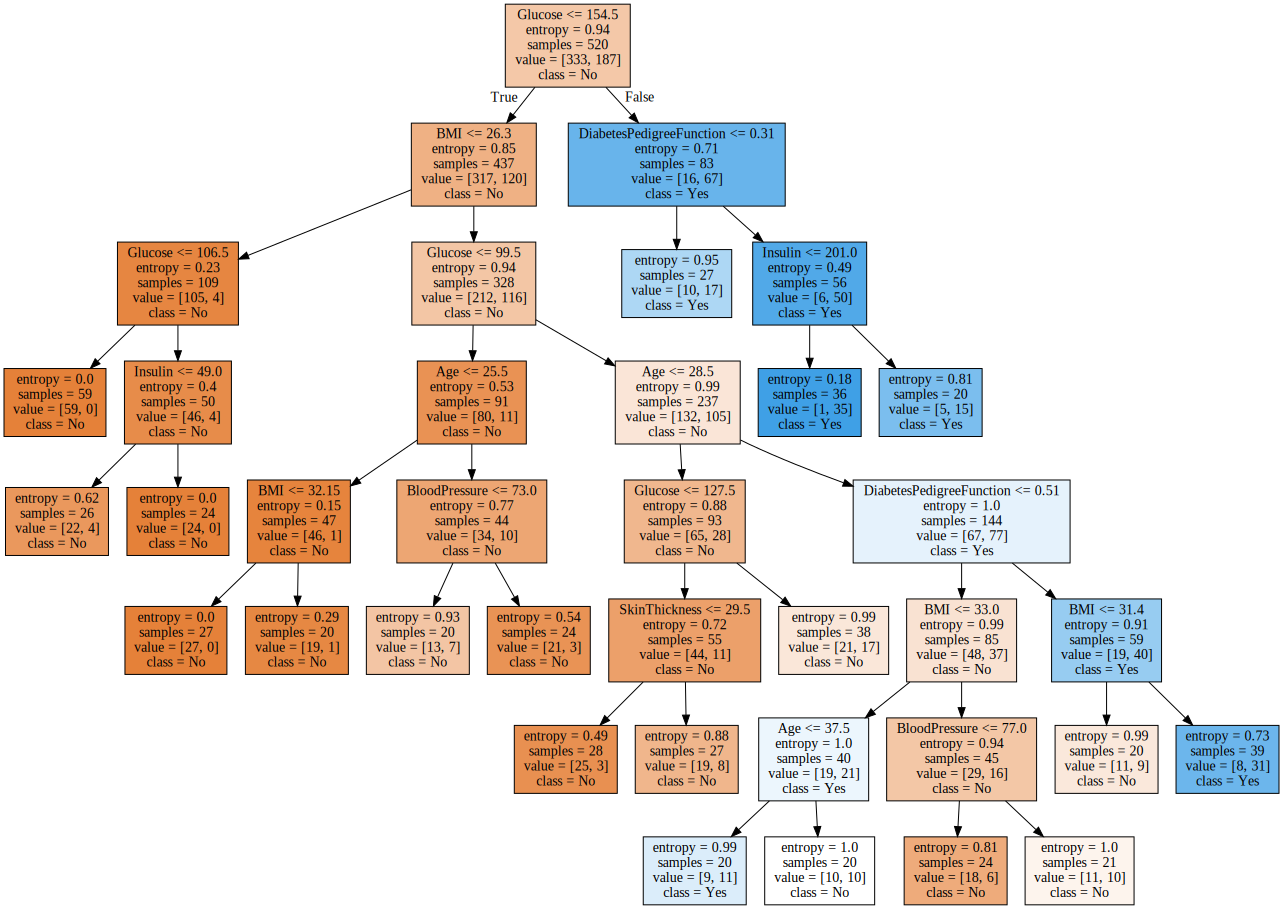

In [9]:
from sklearn.tree import export_graphviz
import graphviz

columns = list(predictors.columns)
export_graphviz(tree, out_file='tree.dot', feature_names=columns, class_names=['No', 'Yes'], proportion = False, precision = 2, filled = True, label='all')

with open('tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)
#Answer - Age <= 37.5 or BloodPressure <= 77.0

Estimate the model using the test data.

Enter the rate of correct answers:

In [10]:
predictors_test = test_data.drop('Outcome', 1)
y_true = test_data['Outcome']
y_pred = model.predict(predictors_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8

Enter the mean of the metrics F1(Macro-F1):

In [11]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred, average='macro')

0.7305484693877551

Make a prediction for the patients 743, 715, 740, 741 (the numbers of strings starting from 0 are specified) from the input dataset.

In [12]:
for patient in [743, 715, 740, 741]:
  #print(df.drop('Outcome', 1).loc[patient])
  print(f'Patient {patient}: classified as', 'Positive' if model.predict([df.drop('Outcome', 1).loc[patient]])[0] else 'Negative')

Patient 743: classified as Positive
Patient 715: classified as Positive
Patient 740: classified as Positive
Patient 741: classified as Negative
